In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as Circle

import numpy as np

import warnings
warnings.filterwarnings("ignore")

Load CSV and drop columns where all the values coincide. For example, the activation used.

In [3]:
df = pd.read_csv("dvip_gp.csv")
df = df.loc[:, (df != df.iloc[0]).any()] 

Group table by their common parameters and compute mean and std over split

In [4]:
def std(x):
    return np.std(x)/np.sqrt(len(x))
full_df = df.groupby(["dataset_name", "regression_coeffs", "bnn_inner_dim", "epochs", "vip_layers", "lr"]).agg(["mean", std])
full_df


split  \
                                                                           mean   
dataset_name regression_coeffs bnn_inner_dim epochs vip_layers lr                 
boston       50                1000          30000  [1]        0.001   9.500000   
                                                    [2]        0.001   9.500000   
                                                    [3]        0.001   9.500000   
                                                    [4]        0.001   9.500000   
                                                    [5]        0.001   9.500000   
...                                                                         ...   
winered      100               1000          20000  [4]        0.001  11.250000   
                                                               0.010  11.235294   
                                                    [5]        0.001   9.181818   
                                                               0.010  11.095238   
                                             30000  [5]        0.001   6.200000   

                                                                                \
                                                                           std   
dataset_name regression_coeffs bnn_inner_dim epochs vip_layers lr                
boston       50                1000          30000  [1]        0.001  1.289380   
                                                    [2]        0.001  1.289380   
                                                    [3]        0.001  1.289380   
                                                    [4]        0.001  1.289380   
                                                    [5]        0.001  1.289380   
...                                                                        ...   
winered      100               1000          20000  [4]        0.001  1.273222   
                                                               0.010  1.454094   
                                                    [5]        0.001  1.982644   
                                                               0.010  1.431592   
                                             30000  [5]        0.001  1.926655   

                                                                       LOSS_train  \
                                                                             mean   
dataset_name regression_coeffs bnn_inner_dim epochs vip_layers lr                   
boston       50                1000          30000  [1]        0.001   277.636310   
                                                    [2]        0.001   285.751740   
                                                    [3]        0.001   274.861145   
                                                    [4]        0.001   274.641310   
                                                    [5]        0.001   275.300947   
...                                                                           ...   
winered      100               1000          20000  [4]        0.001  1732.982384   
                                                               0.010  1438.679652   
                                                    [5]        0.001  1733.106656   
                                                               0.010  1263.521891   
                                             30000  [5]        0.001  1725.372192   

                                                                                 \
                                                                            std   
dataset_name regression_coeffs bnn_inner_dim epochs vip_layers lr                 
boston       50                1000          30000  [1]        0.001   3.205699   
                                                    [2]        0.001   3.548431   
                                                    [3]        0.001   3.146736   
                                                    [4]        0.001   3.

In [5]:
df.groupby(["regression_coeffs", "bnn_inner_dim", "epochs", "lr"]).mean().index

MultiIndex([( 50, 1000, 30000, 0.001),
            ( 50, 2000, 30000, 0.001),
            (100, 1000, 20000, 0.001),
            (100, 1000, 20000,  0.01),
            (100, 1000, 30000, 0.001)],
           names=['regression_coeffs', 'bnn_inner_dim', 'epochs', 'lr'])

# Comparative with other models

In [6]:
vip = full_df.query("lr == 0.001 and epochs == 20000 and regression_coeffs == 100 and bnn_inner_dim == 1000")
#vip =  full_df.query("prior_kl == True and bnn_structure == '[10]'")
vip


split  \
                                                                           mean   
dataset_name regression_coeffs bnn_inner_dim epochs vip_layers lr                 
boston       100               1000          20000  [1]        0.001   9.500000   
                                                    [2]        0.001   9.500000   
                                                    [3]        0.001   9.500000   
                                                    [4]        0.001   9.500000   
                                                    [5]        0.001   9.500000   
concrete     100               1000          20000  [1]        0.001   9.500000   
                                                    [2]        0.001   9.500000   
                                                    [3]        0.001   9.500000   
                                                    [4]        0.001   9.500000   
                                                    [5]        0.001   9.500000   
energy       100               1000          20000  [1]        0.001   9.500000   
                                                    [2]        0.001   9.500000   
                                                    [3]        0.001   9.500000   
                                                    [4]        0.001   9.500000   
                                                    [5]        0.001   9.500000   
winered      100               1000          20000  [1]        0.001   9.500000   
                                                    [2]        0.001   9.500000   
                                                    [3]        0.001   9.315789   
                                                    [4]        0.001  11.250000   
                                                    [5]        0.001   9.181818   

                                                                                \
                                                                           std   
dataset_name regression_coeffs bnn_inner_dim epochs vip_layers lr                
boston       100               1000          20000  [1]        0.001  1.289380   
                                                    [2]        0.001  1.289380   
                                                    [3]        0.001  1.289380   
                                                    [4]        0.001  1.289380   
                                                    [5]        0.001  1.289380   
concrete     100               1000          20000  [1]        0.001  1.289380   
                                                    [2]        0.001  1.289380   
                                                    [3]        0.001  1.289380   
                                                    [4]        0.001  1.289380   
                                                    [5]        0.001  1.289380   
energy       100               1000          20000  [1]        0.001  1.289380   
                                                    [2]        0.001  1.289380   
                                                    [3]        0.001  1.289380   
                                                    [4]        0.001  1.289380   
                                                    [5]        0.001  1.289380   
winered      100               1000          20000  [1]        0.001  1.289380   
                                                    [2]        0.001  1.289380   
                                                    [3]        0.001  1.344019   
                                                    [4]        0.001  1.273222   
                                                    [5]        0.001  1.982644   

                                                                       LOSS_train  \
                                                                             mean   
dataset_name regression_coeffs bnn_inner_dim epochs vip_layers lr                   
boston       100      

In [9]:
df.query("dataset_name == 'winered' and vip_layers == '[5]' and lr == 0.001 and epochs == 20000 and regression_coeffs == 100 and bnn_inner_dim == 1000")

,dataset_name,epochs,vip_layers,bnn_inner_dim,regression_coeffs,lr,split,LOSS_train,RMSE_train,NLL_train,CRPS_train,LOSS,RMSE,NLL,CRPS
332,winered,20000,[5],1000,100,0.001,1,1597.262451,0.451374,0.633706,0.252544,535.680481,0.700863,1.177881,0.396233
343,winered,20000,[5],1000,100,0.001,4,1744.080200,0.620031,0.940894,0.345304,244.980347,0.650641,0.987628,0.360602
384,winered,20000,[5],1000,100,0.001,16,1744.439331,0.616271,0.935015,0.343447,255.599579,0.690429,1.050833,0.380749
417,winered,20000,[5],1000,100,0.001,15,1737.961792,0.621792,0.943912,0.345566,235.359955,0.621895,0.944714,0.353835
569,winered,20000,[5],1000,100,0.001,17,1775.703125,0.622739,0.946155,0.347775,272.634857,0.660249,0.996679,0.359017
664,winered,20000,[5],1000,100,0.001,5,1742.582275,0.624519,0.948312,0.347831,230.672333,0.609083,0.922498,0.338635
681,winered,20000,[5],1000,100,0.001,19,1737.613770,0.625052,0.949127,0.348139,233.030457,0.613486,0.928351,0.342997
715,winered,20000,[5],1000,100,0.001,3,1741.923706,0.618209,0.938013,0.344450,244.666229,0.644988,0.978282,0.354510
1453,winered,20000,[5],1000,100,0.001,10,1741.855713,0.626592,0.951473,0.348768,224.890167,0.578893,0.884485,0.327002
1834,winered,20000,[5],1000,100,0.001,11,1748.722778,0.618246,0.938174,0.344505,247.720871,0.662684,1.005021,0.366723


In [332]:
doubly = pd.read_csv("doubly.csv")
doubly.query("split == 1").groupby(["dataset", "layers"]).mean()

split       NLL      RMSE      CRPS
dataset  layers                                     
boston   1         1.0  3.687451  5.748987  2.338164
         2         1.0  3.667360  5.725463  2.333248
         3         1.0  3.613092  5.765113  2.361750
         4         1.0  3.566106  5.739050  2.351536
         5         1.0  3.605284  5.771720  2.380911
concrete 1         1.0  3.162533  6.152523  3.229845
         2         1.0  3.167544  6.167850  3.236440
         3         1.0  3.167365  6.157814  3.232903
         4         1.0  3.186018  6.259585  3.281832
         5         1.0  3.125844  5.733302  3.022070
energy   1         1.0  1.069268  0.636434  0.375600
         2         1.0  0.523029  0.342339  0.200995
         3         1.0  0.736397  0.404952  0.246704
         4         1.0  0.749774  0.400036  0.249073
         5         1.0  0.567987  0.358603  0.211217
kin8nm   1         1.0 -0.960075  0.089137  0.050378
         2         1.0 -1.367039  0.060838  0.034378
         3         1.0 -1.401582  0.059207  0.033327
naval    1         1.0 -6.097635  0.000323  0.000243
         2         1.0 -7.175583  0.000066  0.000075
         3         1.0 -7.225494  0.000087  0.000075
         4         1.0 -6.891720  0.000147  0.000110
power    1         1.0  2.752795  3.770958  2.123705
         2         1.0  2.706848  3.596059  2.011604
         3         1.0  2.667128  3.444646  1.923318
         4         1.0  2.668700  3.455492  1.925555
         5         1.0  2.671354  3.466905  1.931529
protein  1         1.0  2.912982  4.455292  2.490859
         2         1.0  2.783145  3.922765  2.151386
         3         1.0  2.726699  3.753930  2.025805
         4         1.0  2.693421  3.656596  1.956014
wine_red 1         1.0  1.010012  0.669484  0.369427
         2         1.0  1.010358  0.669271  0.369358
         3         1.0  1.004657  0.666049  0.367591
         4         1.0  1.004930  0.666451  0.368104
         5         1.0  1.006397  0.667732  0.368380

In [333]:
doubly = doubly.groupby(["dataset", "layers"]).agg(["mean", std]).drop("split", axis = 1)
doubly

NLL                RMSE                CRPS          
                     mean       std      mean       std      mean       std
dataset  layers                                                            
boston   1       2.621324  0.061539  3.461930  0.172243  1.778254  0.054756
         2       2.619427  0.060715  3.464310  0.174090  1.775397  0.055053
         3       2.618580  0.057986  3.477714  0.176407  1.780114  0.056023
         4       2.612612  0.056778  3.459250  0.180476  1.768086  0.057338
         5       2.619665  0.058376  3.483772  0.184585  1.778915  0.059403
concrete 1       3.134538  0.016871  5.699006  0.128251  3.104325  0.057626
         2       3.137992  0.016458  5.709117  0.127669  3.113382  0.057095
         3       3.142599  0.016832  5.724927  0.129163  3.125693  0.058891
         4       3.134859  0.017792  5.658314  0.130668  3.083788  0.057433
         5       3.092611  0.015842  5.374571  0.115534  2.942421  0.051177
energy   1       1.141213  0.016797  0.713296  0.020260  0.414601  0.009610
         2       0.661802  0.019321  0.451084  0.012712  0.252025  0.005593
         3       0.711009  0.021007  0.462688  0.013160  0.262231  0.005888
         4       0.759983  0.021207  0.478973  0.014059  0.273281  0.006523
         5       0.700959  0.021684  0.458096  0.015404  0.259230  0.007059
kin8nm   1      -0.975375  0.003277  0.086898  0.000536  0.049229  0.000258
         2      -1.350378  0.004308  0.062584  0.000347  0.035030  0.000162
         3      -1.382660  0.006671  0.060735  0.000458  0.033985  0.000235
naval    1      -6.475724  0.117892  0.000285  0.000035  0.000185  0.000020
         2      -6.894672  0.101289  0.000152  0.000036  0.000119  0.000017
         3      -7.039468  0.049660  0.000085  0.000012  0.000091  0.000006
         4      -6.959729  0.055067  0.000109  0.000016  0.000102  0.000007
         5      -6.873125  0.072354  0.000159  0.000025  0.000120  0.000010
power    1       2.806324  0.009995  3.993163  0.040720  2.173505  0.011311
         2       2.770222  0.009873  3.850422  0.038183  2.075122  0.009159
         3       2.747370  0.012654  3.760601  0.049078  2.023911  0.015586
         4       2.732378  0.011725  3.702821  0.045233  1.984471  0.012649
         5       2.735273  0.010918  3.712386  0.041823  1.991525  0.009105
protein  1       2.907479  0.002265  4.428554  0.011083  2.481267  0.005884
         2       2.786240  0.002311  3.936413  0.010322  2.161253  0.004967
         3       2.715014  0.002847  3.708458  0.011970  2.002001  0.005932
         4       2.689973  0.002877  3.641484  0.011498  1.950791  0.005703
         5       2.692614  0.004289  3.663181  0.016545  1.957200  0.008180
wine_red 1       0.928739  0.012829  0.614669  0.008504  0.340628  0.004178
         2       0.928976  0.012711  0.614753  0.008461  0.340674  0.004151
         3       0.929331  0.012509  0.615001  0.008325  0.340852  0.004091
         4       0.929474  0.012561  0.614968  0.008397  0.340988  0.004120
         5       0.929893  0.012395  0.615139  0.008317  0.341113  0.004076

In [334]:
def comparative_plot(model_names, mean_values, std_values, colors, ax):
    """
    Creates a plot where the different models are shown in the "y" axis and mean and std values on the x axis.
    The first model is used to create a vertical dashed line, as a benchmark.
    """
    # Compute mean and std of points 
    mean = np.nanmean(mean_values)
    std = np.nanstd(mean_values)
    # Replace non-existint results (np.nan) with a white point (invisible).
    nan_pos = np.isnan(mean_values)
    c = np.array(colors)
    c[nan_pos] = "white"
    means = np.array(mean_values)
    means[nan_pos] = mean
    
    # Compute points that are far from the mean and meake them invisible
    far = means - mean > 3*std
    means[far] = mean
    c[far] = "white"
    
    # Scatter points
    ax.scatter(means, model_names, c = c, plotnonfinite = True)
    # Draw std horizontal lines
    ax.hlines(np.array(model_names)[~far], np.array(mean_values - std_values)[~far],np.array(means + std_values)[~far], colors= np.array(colors)[~far])
    # Draw baseline line on first model
    if far[0] == False:
        ax.axvline(mean_values[0], linestyle = "dashed", color = "k")
    
    # Plot an arrow for far points.
    if far.any() != 0:
        x_min, x_max = ax.get_xlim()
        slope = (x_max - x_min)/5
        ax.arrow(x = x_max - slope, y = np.array(model_names)[far][0], 
                 dx = slope, dy =0, color = np.array(colors)[far][0],
                 width = 0.002, head_width=0.3, head_length=slope/3, linewidth=1, length_includes_head = True,
                )
        
def get_dataset(dataset, metric, agg, train_metrics = False):
    if dataset == "winered":
        d_dataset = "wine_red"
    else:
        d_dataset = dataset
    vip_query = vip.query("dataset_name == @dataset").xs((metric + "_train" if train_metrics else metric, agg),axis=1).to_frame()
    #vip100_query = vip100.query("dataset_name == @dataset").xs((metric, agg),axis=1).to_frame()
    doubly_query = doubly.query("dataset == @d_dataset").xs((metric, agg),axis=1).to_frame()
    
    def item(array):
        if array.size == 0:
            return np.nan
        else:
            return array.item()
    
    ret = {"VIP": item(vip_query.query("vip_layers == '[1]'").to_numpy()),
          "DVIP 2": item(vip_query.query("vip_layers == '[2]'").to_numpy()),
          "DVIP 3": item(vip_query.query("vip_layers == '[3]'").to_numpy()),
          "DVIP 4": item(vip_query.query("vip_layers == '[4]'").to_numpy()),
          "DVIP 5": item(vip_query.query("vip_layers == '[5]'").to_numpy()),
          #"VIP 100": item(vip100_query.query("vip_layers == '[1]'").to_numpy()),
          "DGP": item(doubly_query.query("layers == 1").to_numpy()),
          "DGP 2": item(doubly_query.query("layers == 2").to_numpy()),
          "DGP 3": item(doubly_query.query("layers == 3").to_numpy()) or np.nan,
          "DGP 4": item(doubly_query.query("layers == 4").to_numpy()) or np.nan,
          "DGP 5": item(doubly_query.query("layers == 5").to_numpy()) or np.nan
    }
    
    return ret

def plot_datasets(dataset_names, model_names, colors, metric, train_metrics = False):
    fig, ax = plt.subplots((len(dataset_names) - 1)//4 + 1, min(len(dataset_names), 4), figsize = (20, 10))
    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    for i in range(len(dataset_names)):
        dataset = dataset_names[i]
        if len(dataset_names) < 4:
            axis = ax[i]
        else:
            axis = ax[i// (len(dataset_names)//2), i%(len(dataset_names)//2)]
        axis.set_title(dataset.capitalize())
        axis.locator_params(axis="x", nbins=4)
        if i % 4 > 0:
            axis.tick_params(left = False)
            axis.set_yticklabels([])
        if i % 4 == min(len(dataset_names), 4) - 1:
            axis.yaxis.tick_right()
            axis.set_yticklabels(model_names)
        
        
        comparative_plot(model_names, 
                         np.array([get_dataset(dataset, metric, "mean", train_metrics).get(model, np.nan) for model in model_names]), 
                         np.array([get_dataset(dataset, metric, "std", train_metrics).get(model, np.nan) for model in model_names]), 
                         [colors[model] for model in model_names], 
                         axis)
        
    handles = [
        Circle.Patch(color='darkblue', label='Single layer models'),
        Circle.Patch(color='teal', label='This work'),
        Circle.Patch(color='darkorange', label='Deep GP models'),
        Circle.Patch(color='orchid', label='Bayesian NN'),
    ]

    if len(dataset_names) < 4:
        ax[len(dataset_names) - 1].legend(loc='upper center', bbox_to_anchor=(-0.6, -0.05),
              fancybox=True, shadow=True, ncol=5, handles = handles)
    else:
        ax[1][1].legend(loc='upper center', bbox_to_anchor=(1.1, -0.15),
              fancybox=True, shadow=True, ncol=5, handles = handles)

In [335]:
dataset_names = ["boston", "energy", "concrete", "winered", "power", "naval", "protein", "kin8nm"]
model_names = ["VIP", "DVIP 2", "DVIP 3", "DVIP 4", "DVIP 5", "VIP 100", "DGP", "DGP 2", "DGP 3", "DGP 4", "DGP 5"]
colors = {"VIP": "darkblue", 
          "DVIP 2": "teal", 
          "DVIP 3": "teal", 
          "DVIP 4": "teal", 
          "DVIP 5": "teal", 
          "VIP 100": "darkblue", 
          "DGP": "darkblue",
          "DGP 2": "darkorange", 
          "DGP 3": "darkorange",
          "DGP 4": "darkorange",
          "DGP 5": "darkorange"}

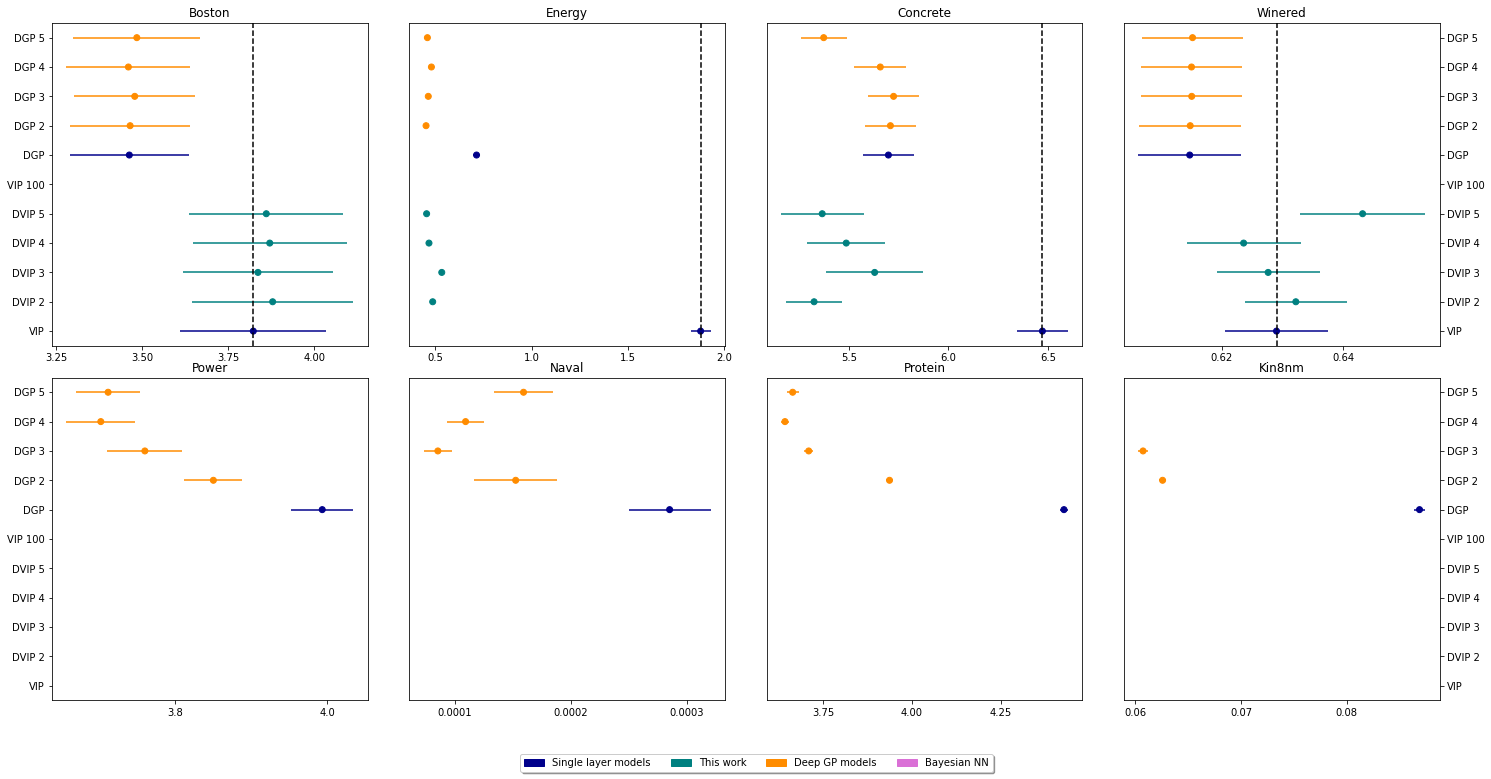

In [336]:
plot_datasets(dataset_names, model_names, colors, "RMSE")

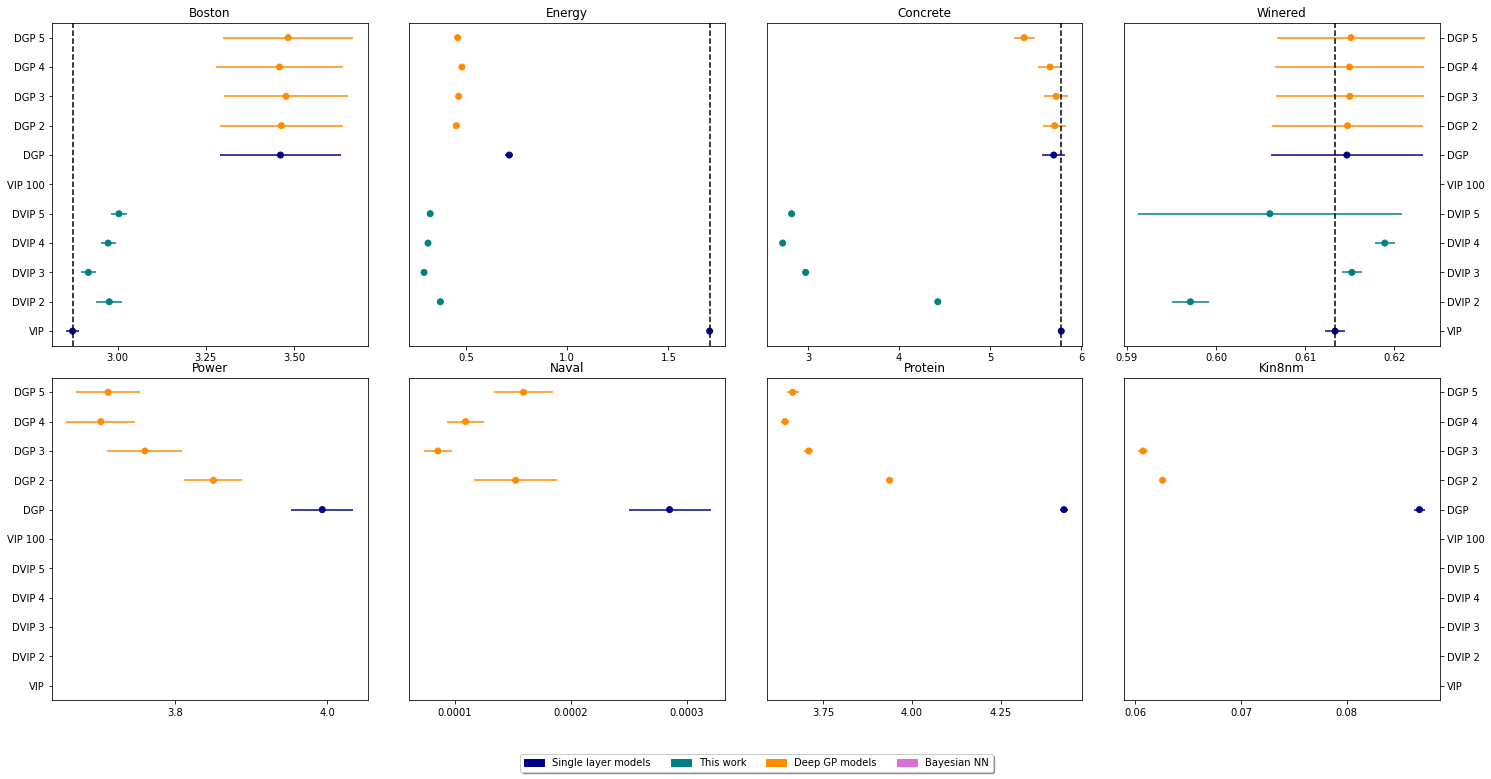

In [337]:
plot_datasets(dataset_names, model_names, colors, "RMSE", train_metrics = True)

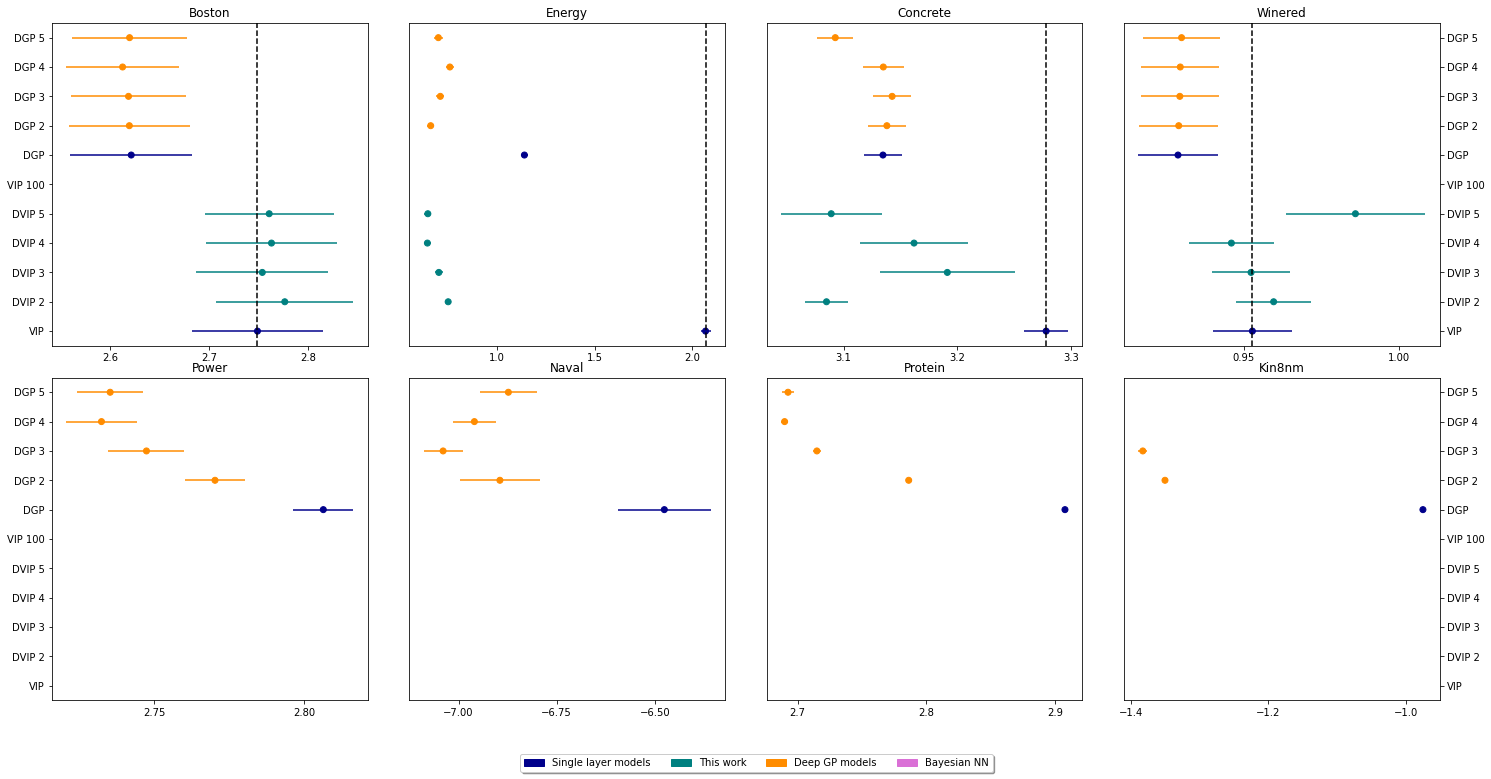

In [338]:
plot_datasets(dataset_names, model_names, colors, "NLL")

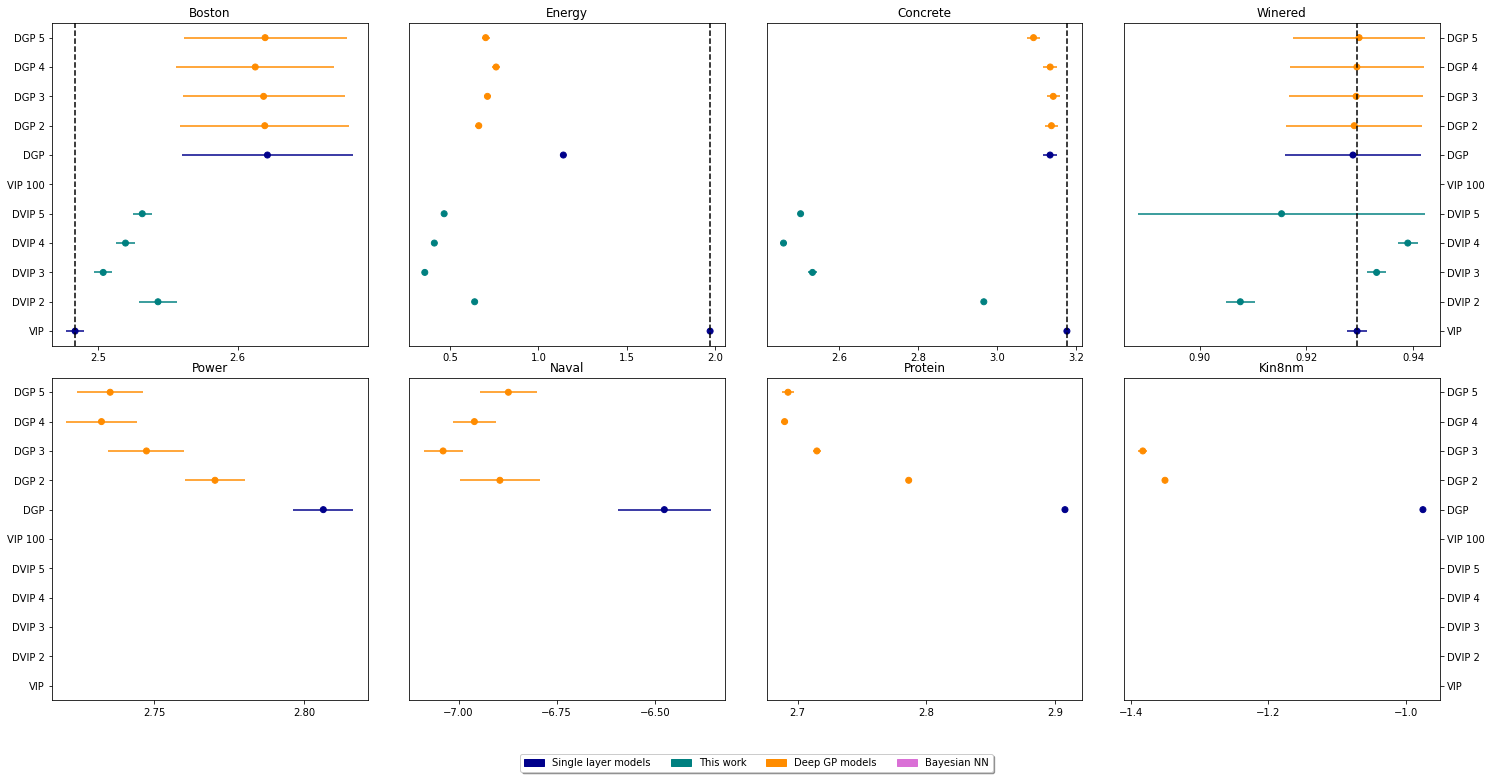

In [339]:
plot_datasets(dataset_names, model_names, colors, "NLL", train_metrics = True)

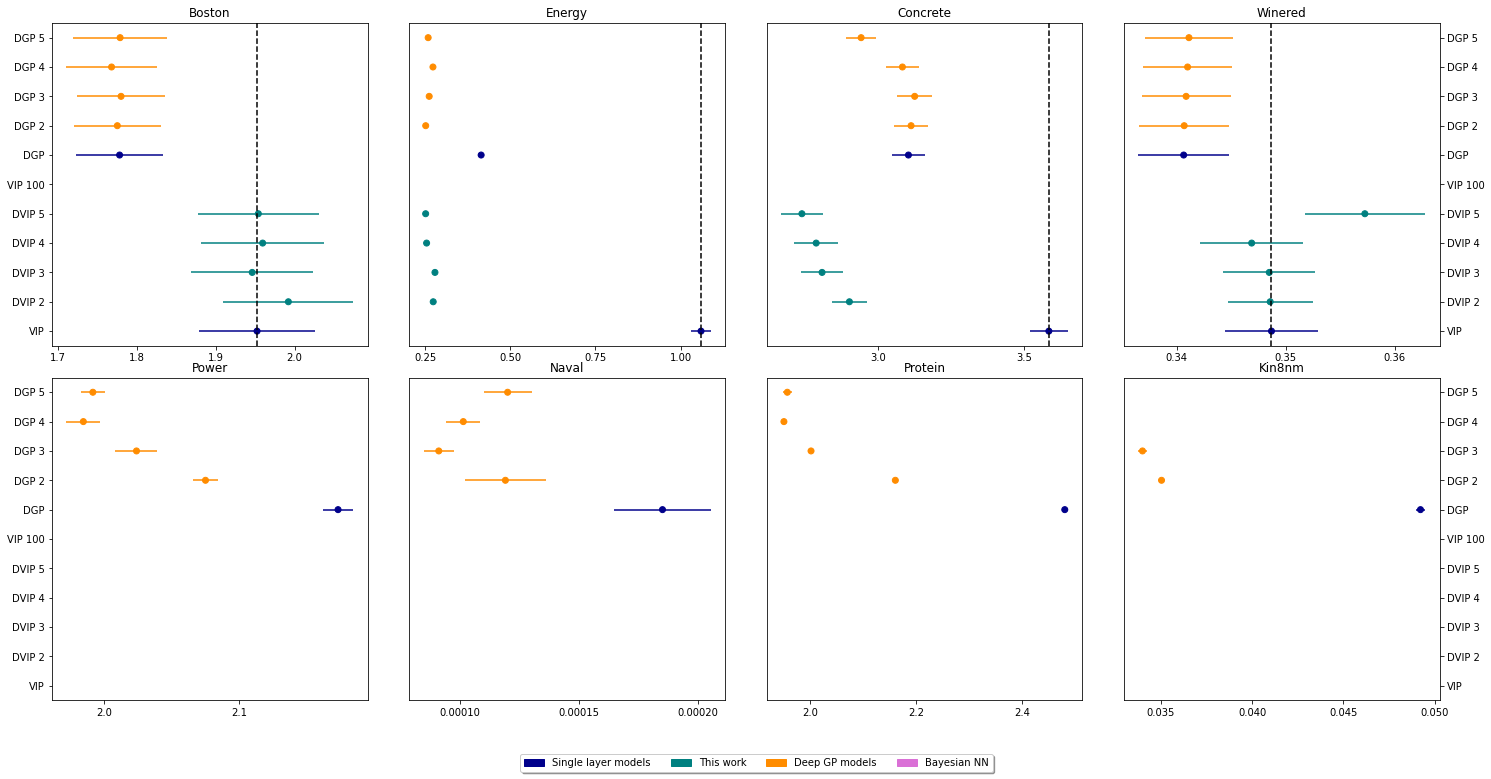

In [340]:
plot_datasets(dataset_names, model_names, colors, "CRPS")

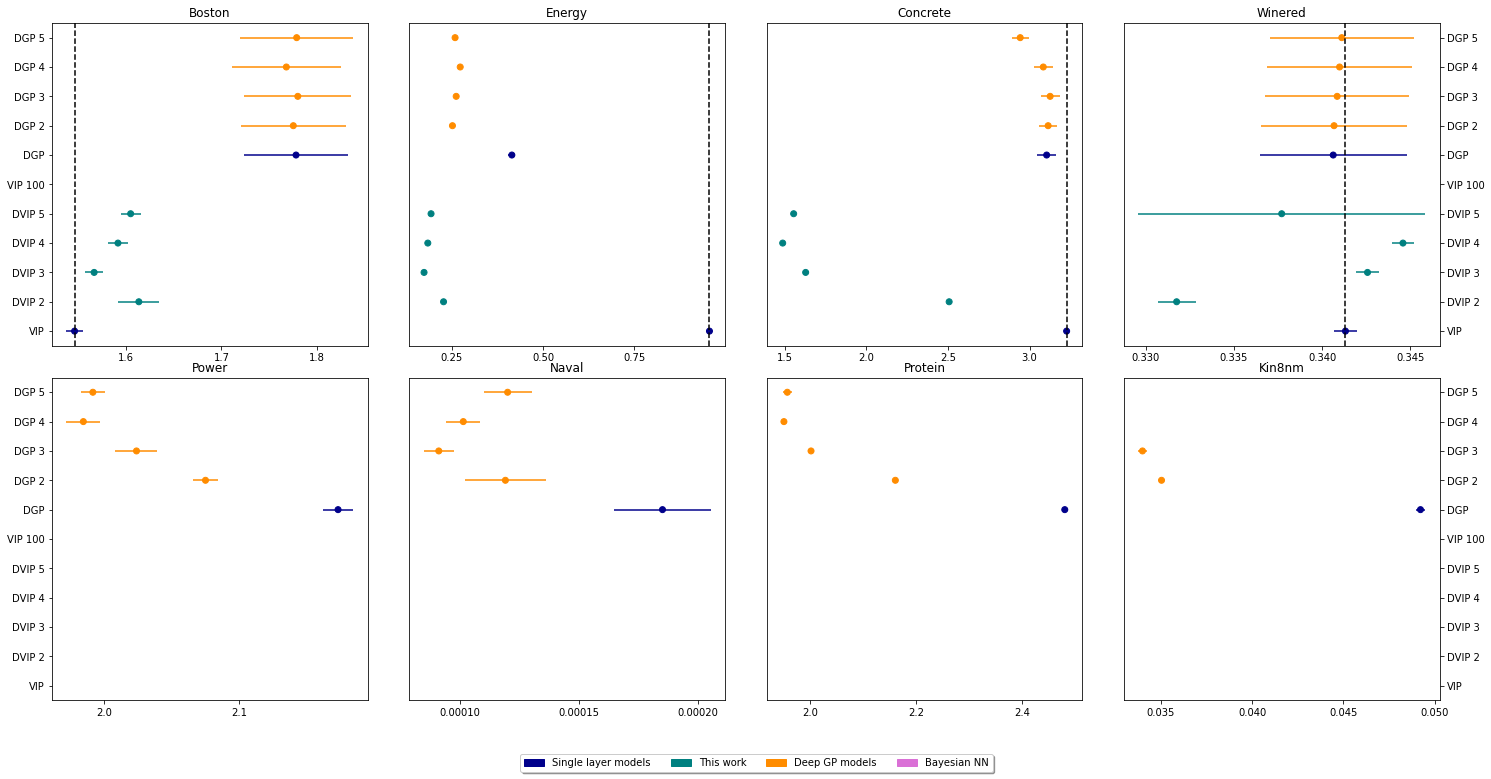

In [341]:
plot_datasets(dataset_names, model_names, colors, "CRPS", train_metrics = True)